# Analyse de température : analyse temporelle 

[cours sur les Time Series](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/#How_to_Analyze_Time_Series?)  
[Source de la donnée de température](https://www.data.gouv.fr/fr/datasets/temperature-quotidienne-departementale-depuis-janvier-2018/)

In [1]:
import pandas

data = pandas.read_csv(".\\DONNEES\\temperature-quotidienne-departementale.csv", sep=";", decimal=".",
                       encoding="utf-8")
data.head()

,date_obs,code_insee_departement,departement,tmin,tmax,tmoy
0,2018-01-01,74,Haute-Savoie,2.60,7.7,5.15
1,2018-01-01,68,Haut-Rhin,5.55,10.2,7.88
2,2018-01-01,7,Ardèche,5.50,11.5,8.50
3,2018-01-01,81,Tarn,6.00,12.4,9.20
4,2018-01-01,48,Lozère,1.10,4.4,2.75


In [2]:
dep = ["95", "94", "91", "78", "93", "92", "75"]
data = data[ data["code_insee_departement"].isin(dep) ]

## Méthode des [moyennes mobiles](https://www.insee.fr/fr/metadonnees/definition/c2091#:~:text=Une%20moyenne%20mobile%20permet%20de,%2C%204%2C%205%2C%20etc.)
### On commence par la méthode SMA

In [3]:
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf

## on va s'intéresser à chaque département, un à un.
## On commence par le Val d'Oise :
val_doise = data[ data["code_insee_departement"] == "95" ]

## paramétrer la colonne de temps comme un index 
val_doise.set_index("date_obs", inplace=True)
## Conserver uniquement les colonnes qui nous intéressent :
val_doise = val_doise[ ["tmoy"] ]
val_doise.head()

,tmoy
date_obs,
2018-01-01,7.80
2018-01-02,9.73
2018-01-03,8.60
2018-01-04,10.60
2018-01-05,9.12


Text(0, 0.5, 'Température en °C')

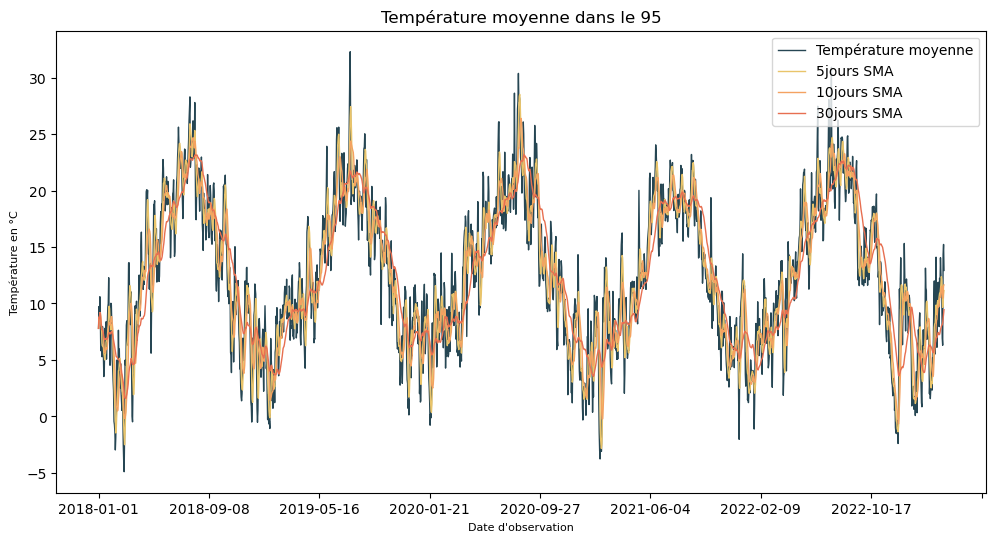

In [4]:
## on va faire une SMA sur une fenêtre de 5 jours pour commencer :

val_doise["jours_5"] = val_doise.tmoy.rolling(5, min_periods=1).mean()

## Ensuite sur 10 jours :
val_doise["jours_10"] = val_doise.tmoy.rolling(10, min_periods=1).mean()

## Puis sur 30 jours :
val_doise["jours_30"] = val_doise.tmoy.rolling(30, min_periods=1).mean()

## Puis définir une couleur pour chaque ligne :
colors = ["#264653", "#e9c46a", "#f4a261", "#e76f51", "#ffb703"]
## ordre : donnée d'origine, 5 jours, 10 jours puis 30 jours

## Line plot :
val_doise.plot(color=colors, linewidth=1, figsize=(12,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend( labels=["Température moyenne", "5jours SMA", "10jours SMA", "30jours SMA"])
plt.title("Température moyenne dans le 95")
plt.xlabel("Date d'observation", fontsize=8)
plt.ylabel("Température en °C", fontsize=8)

### Moyenne mobile cumulée (CMA)

Text(0, 0.5, 'Temperature [°C]')

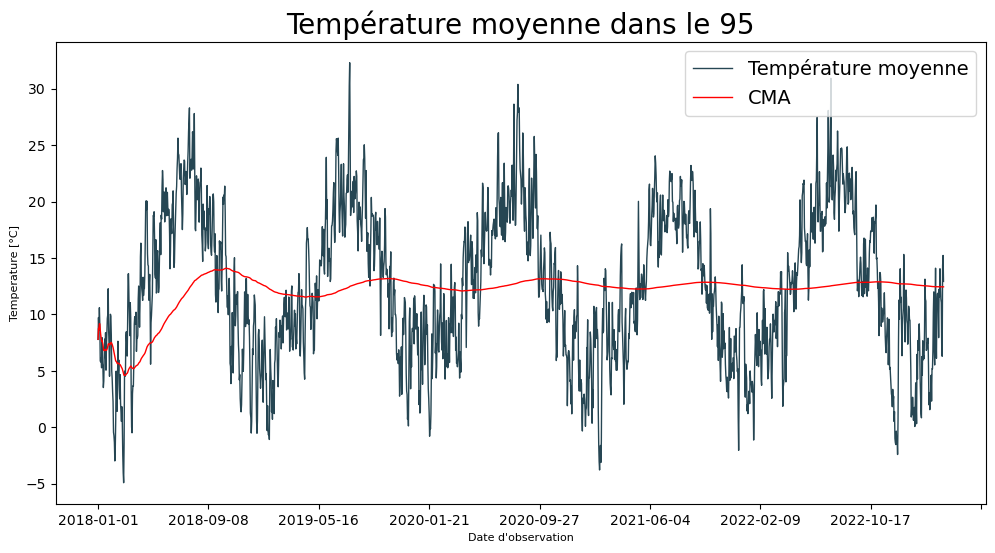

In [6]:
val_doise["CMA"] = val_doise.tmoy.expanding().mean()

## couleurs pour les représentations :
colors = [ "#264653", "red" ]
## line plot :
val_doise[ ["tmoy", "CMA"] ].plot(color=colors, linewidth=1, figsize=(12,6))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels =['Température moyenne', 'CMA'], fontsize=14)
plt.title('Température moyenne dans le 95', fontsize=20)
plt.xlabel("Date d'observation", fontsize=8)
plt.ylabel('Temperature [°C]', fontsize=8)